In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import os

In [2]:
data = {}

In [3]:
files = os.listdir()
files.remove('stackoverflow-analysis.ipynb')
files.remove('.DS_Store')
files

['2020.csv',
 '2019.csv',
 '2018.csv',
 '2015.csv',
 '2014.csv',
 '2016.csv',
 '2017.csv',
 '2013.csv',
 '2012.csv',
 '2011.csv']

In [4]:
dataframes = []
for f in files:
    dataframes.append(pd.read_csv(f, encoding="ISO-8859-1"))

In [5]:
files[0]

'2020.csv'

<AxesSubplot:>

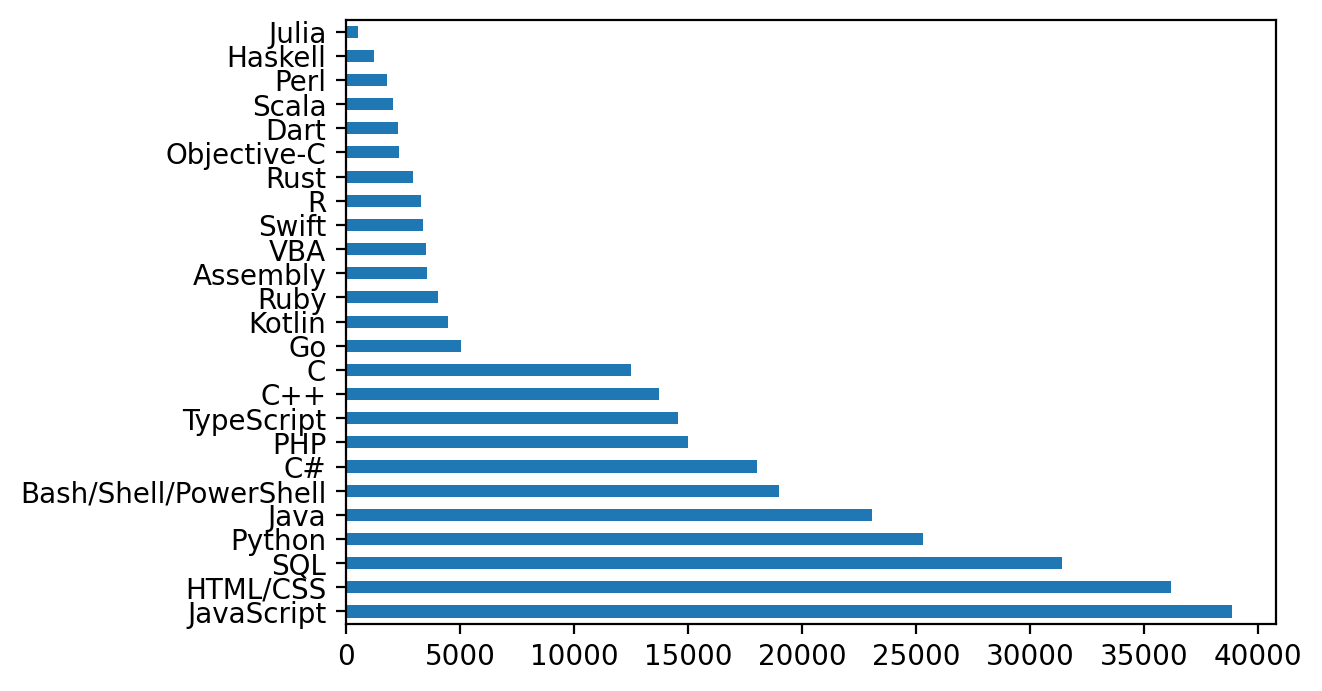

In [32]:
plt.figure(dpi=200)
Year2020 = dataframes[0]['LanguageWorkedWith'].str.split(';').explode()
Year2020 = Year2020.value_counts()
data['2020'] = Year2020
Year2020.plot(kind='barh')

In [7]:
files[1]

'2019.csv'

<AxesSubplot:>

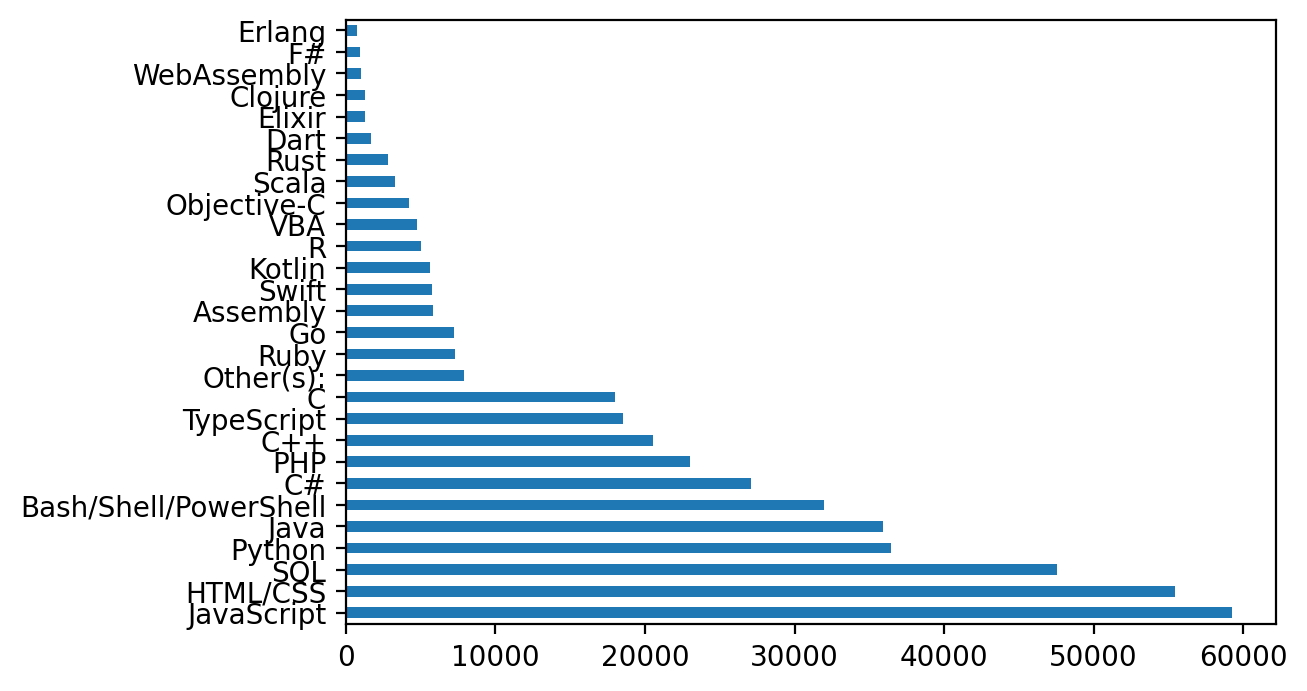

In [33]:
plt.figure(dpi=200)
Year2019 = dataframes[1]['LanguageWorkedWith'].str.split(';').explode()
Year2019 = Year2019.value_counts()
data['2019'] = Year2019
Year2019.plot(kind='barh')

In [9]:
files[2]

'2018.csv'

<AxesSubplot:>

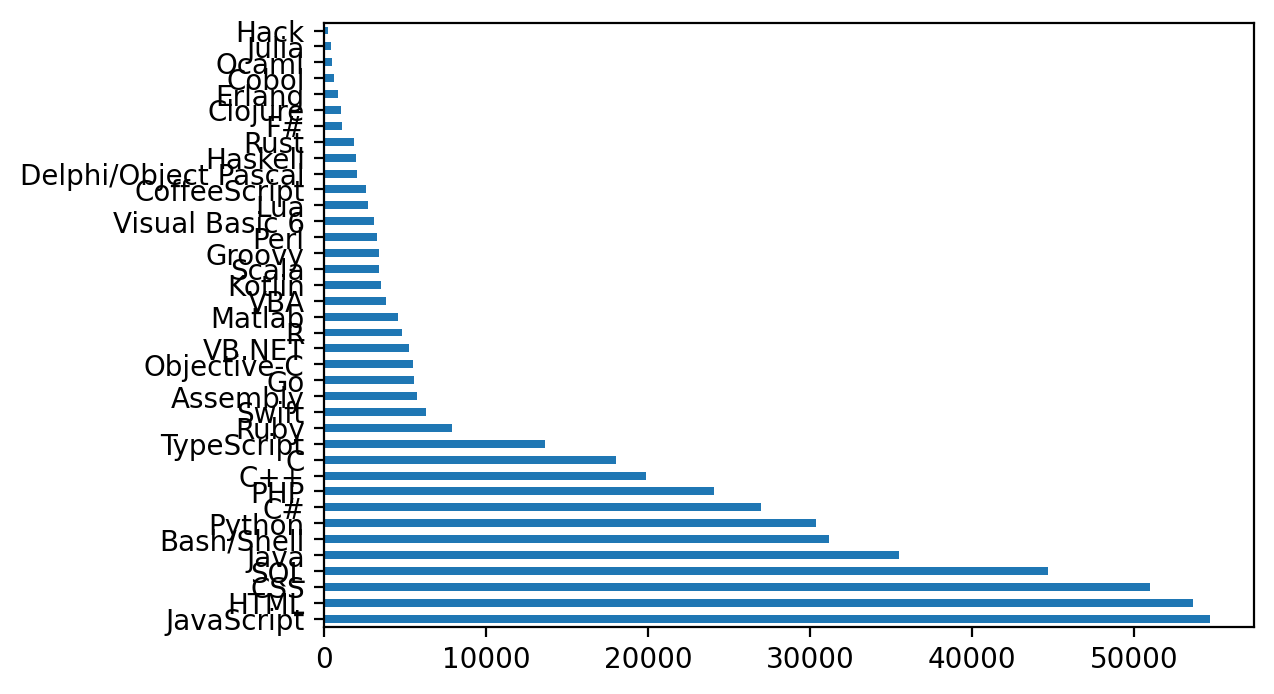

In [34]:
plt.figure(dpi=200)
Year2018 = dataframes[2]['LanguageWorkedWith'].str.split(';').explode()
Year2018 = Year2018.value_counts()
data['2018'] = Year2018
Year2018.plot(kind='barh')

In [11]:
files[3]

'2015.csv'

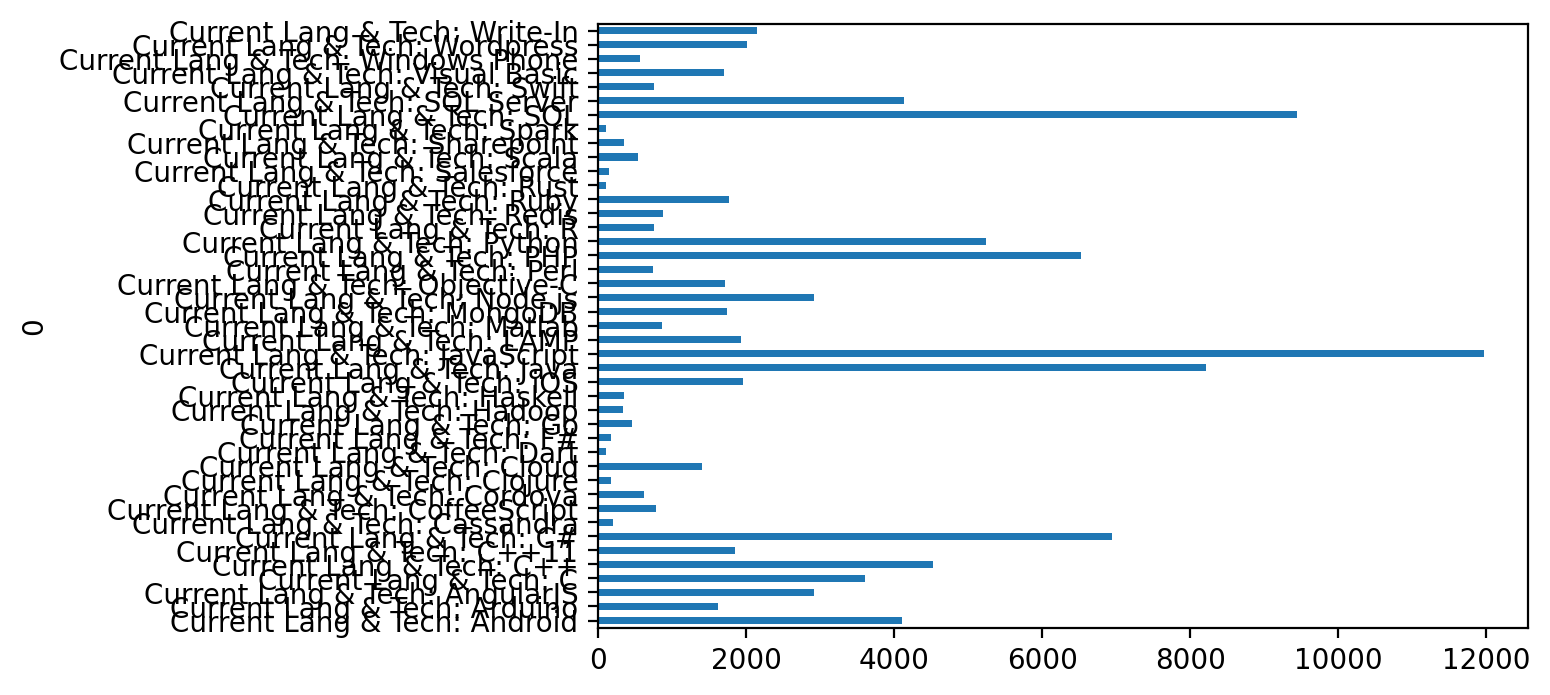

In [12]:
plt.figure(dpi=200)
dataframes[3].columns = dataframes[3].iloc[0]
dataframes[3].filter(regex="Current Lang").drop(0, axis=0).count().plot(kind='barh')
data['2015'] = dataframes[3].filter(regex="Current Lang").drop(0, axis=0).count()

In [13]:
files[4]

'2014.csv'

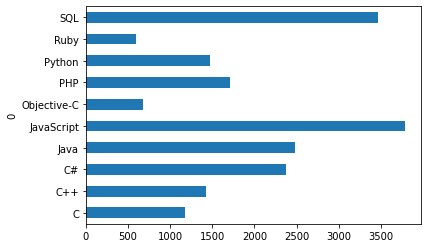

In [14]:
dataframes[4].columns = dataframes[4].iloc[0]
dataframes[4][['C','C++','C#','Java','JavaScript', 'Objective-C','PHP','Python','Ruby','SQL']].count().plot(kind='barh')
data['2014'] = dataframes[4][['C','C++','C#','Java','JavaScript', 'Objective-C','PHP','Python','Ruby','SQL']].count()

In [15]:
files[5]

'2016.csv'

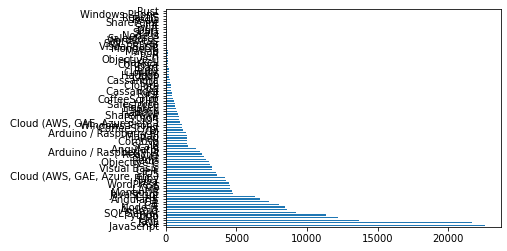

In [16]:
dataframes[5]['tech_do'].str.split(';').explode().value_counts().plot(kind='barh')
data['2016'] = dataframes[5]['tech_do'].str.split(';').explode().value_counts()

In [17]:
files[6]

'2017.csv'

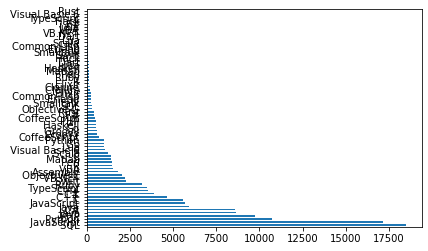

In [18]:
dataframes[6]['HaveWorkedLanguage'].str.split(';').explode().value_counts().plot(kind='barh')
data['2017'] = dataframes[6]['HaveWorkedLanguage'].str.split(';').explode().value_counts()

In [19]:
files[7]

'2013.csv'

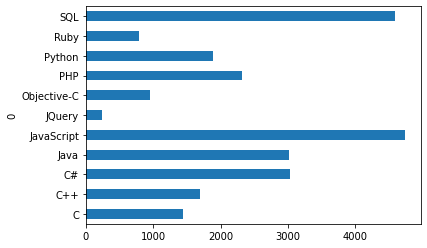

In [20]:
dataframes[7].columns = dataframes[7].iloc[0]
dataframes[7][['C','C++','C#','Java','JavaScript', 'JQuery','Objective-C','PHP','Python','Ruby','SQL']].count().plot(kind='barh')
data['2013'] = dataframes[7][['C','C++','C#','Java','JavaScript', 'JQuery','Objective-C','PHP','Python','Ruby','SQL']].count()

In [21]:
files[8]

'2012.csv'

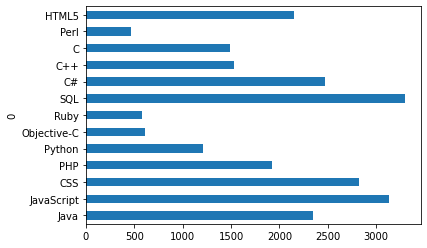

In [22]:
dataframes[8].columns = dataframes[8].iloc[0]
dataframes[8][['Java','JavaScript', 'CSS','PHP', 'Python','Objective-C','Ruby','SQL','C#','C++','C','Perl','HTML5']].count().plot(kind='barh')
data['2012'] = dataframes[8][['Java','JavaScript', 'CSS','PHP', 'Python','Objective-C','Ruby','SQL','C#','C++','C','Perl','HTML5']].count()

In [23]:
files[9]

'2011.csv'

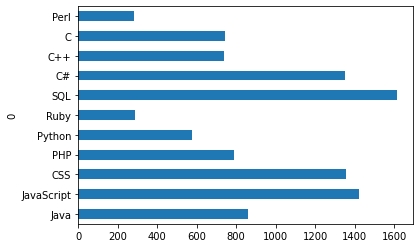

In [24]:
dataframes[9].columns = dataframes[9].iloc[0]
dataframes[9][['Java', 'JavaScript', 'CSS', 'PHP','Python','Ruby','SQL','C#','C++','C','Perl']].count().plot(kind='barh')
data['2011'] = dataframes[9][['Java', 'JavaScript', 'CSS', 'PHP','Python','Ruby','SQL','C#','C++','C','Perl']].count()

In [128]:
df = pd.DataFrame(data)
df = df.transpose()
#Current Lang & Tech: 

In [177]:
df.columns = df.columns.str.replace(r'Current Lang & Tech:', ' ')
df.columns = df.columns.str.strip()
df = df.groupby(df.columns, axis=1).sum()
df.sort_index(ascending=True, inplace=True)

In [188]:
top10 = df.transpose().nlargest(10, df.transpose().columns)
top10

,2011,2012,2013,2014,2015,2016,2017,2018,2019,2020
SQL,1614.0,3295.0,4594.0,3468.0,9439.0,21976.0,18754.0,44670.0,47544.0,31413.0
JavaScript,1420.0,3128.0,4736.0,3784.0,11962.0,27385.0,22875.0,54686.0,59219.0,38822.0
CSS,1357.0,2825.0,0.0,0.0,0.0,0.0,0.0,50979.0,0.0,0.0
C#,1353.0,2469.0,3028.0,2379.0,6949.0,15283.0,12476.0,26954.0,27097.0,18041.0
Java,862.0,2349.0,3021.0,2480.0,8219.0,17942.0,14524.0,35521.0,35917.0,23074.0
PHP,789.0,1926.0,2325.0,1711.0,6529.0,12780.0,10290.0,24071.0,23030.0,15007.0
C,742.0,1485.0,1437.0,1175.0,3612.0,7678.0,6974.0,18042.0,18017.0,12487.0
C++,741.0,1527.0,1697.0,1419.0,4529.0,9589.0,8155.0,19872.0,20524.0,13707.0
Python,576.0,1211.0,1881.0,1474.0,5238.0,12282.0,11704.0,30359.0,36443.0,25287.0
Ruby,286.0,578.0,795.0,594.0,1765.0,4383.0,3324.0,7911.0,7331.0,4046.0


<AxesSubplot:>

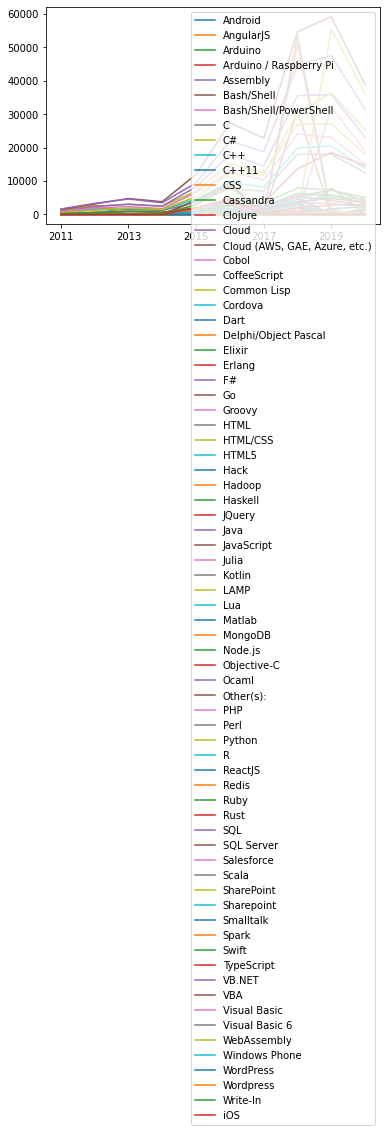

In [178]:
df.plot()

<AxesSubplot:>

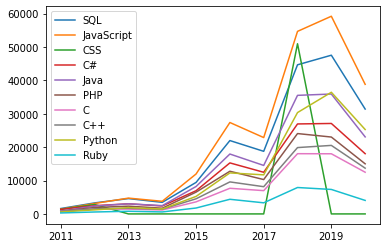

In [187]:
top10.transpose().plot()